In [ ]:
#Requirements
#!pip install pandas matplotlib seaborn nltk numpy scikit-learn networkx wordcloud matplotlib-venn

In [3]:
#Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from itertools import combinations
from collections import Counter
from matplotlib_venn import venn2

ModuleNotFoundError: No module named 'matplotlib_venn'

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Loading the data

In [66]:
# Load Reddit data
with open('cleaned_reddit_data.json', 'r') as f:
    reddit_data = json.load(f)

reddit_df = pd.DataFrame(reddit_data)
reddit_df.head()

,title,score,num_comments,created,selftext,title_length,selftext_length,engagement
0,ownership job left futur,0,10,1729126284000,thinking future ownership ai robotics poised b...,24,574,0.00
1,discussioncriticism ultra sketicistism regardi...,0,18,1729014060000,greeting salutation fellow future thinking peo...,93,9326,0.00
2,chance gen x millennials could live beyond tha...,0,112,1728691265000,rapid advancement medical technology like gene...,77,464,0.00
3,feel like military future start hiring gamers ...,0,71,1728483810000,flair military chose discussion flair tends co...,83,700,0.00
4,many change last decade much opportunity lost ...,7,27,1728324283000,crypto nfts pharmaceutical ai people jumping g...,86,180,0.25


In [68]:
# Load YouTube data
with open('cleaned_youtube_data.json', 'r') as f:
    youtube_data = json.load(f)

youtube_df = pd.DataFrame(youtube_data)
youtube_df.head()

,video_id,title,description,channel_title,comments,published_at
0,-DqKHc4ybFU,ai changing everything future job society,How AI is Changing Everything: The Future of J...,GyaaniBanda,[],None
1,0SJTB2UI2jk,sam altman predicts ai new era job,"In this insightful interview, Sam Altman share...",NeuroPrompt - AI Future Technologies,[],None
2,TvhBmj2RUq0,top future high paying job ai high paying job ...,,HK Nextgen Education,[],None
3,ghtYU2N8GxI,quotwill ai replace job exploring future workquot,"In this video, we explore the impact of artifi...",Ask,[],None
4,u0TZv-qKjVE,impact ai future job market need know,"In this eye-opening video, we delve into the f...",Real World Vidz,[],None


Defining a simple Preprocess_Text Function (Majority of the Cleaning is Already Done)

In [71]:
# Text Preprocessing Function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Rejoin words
    return ' '.join(tokens)

# Processing Reddit Data

##### Minor Preprocessing

Combine Title and Selftext into a New Column 'Text'

In [76]:
# Combine title and selftext
reddit_df['text'] = reddit_df['title'] + ' ' + reddit_df['selftext']
reddit_df.head()

,title,score,num_comments,created,selftext,title_length,selftext_length,engagement,text
0,ownership job left futur,0,10,1729126284000,thinking future ownership ai robotics poised b...,24,574,0.00,ownership job left futur thinking future owner...
1,discussioncriticism ultra sketicistism regardi...,0,18,1729014060000,greeting salutation fellow future thinking peo...,93,9326,0.00,discussioncriticism ultra sketicistism regardi...
2,chance gen x millennials could live beyond tha...,0,112,1728691265000,rapid advancement medical technology like gene...,77,464,0.00,chance gen x millennials could live beyond tha...
3,feel like military future start hiring gamers ...,0,71,1728483810000,flair military chose discussion flair tends co...,83,700,0.00,feel like military future start hiring gamers ...
4,many change last decade much opportunity lost ...,7,27,1728324283000,crypto nfts pharmaceutical ai people jumping g...,86,180,0.25,many change last decade much opportunity lost ...


Applying the Preprocess function

In [79]:
reddit_df['clean_text'] = reddit_df['text'].apply(preprocess_text)
reddit_df.head()

,title,score,num_comments,created,selftext,title_length,selftext_length,engagement,text,clean_text
0,ownership job left futur,0,10,1729126284000,thinking future ownership ai robotics poised b...,24,574,0.00,ownership job left futur thinking future owner...,ownership job left futur thinking future owner...
1,discussioncriticism ultra sketicistism regardi...,0,18,1729014060000,greeting salutation fellow future thinking peo...,93,9326,0.00,discussioncriticism ultra sketicistism regardi...,discussioncriticism ultra sketicistism regardi...
2,chance gen x millennials could live beyond tha...,0,112,1728691265000,rapid advancement medical technology like gene...,77,464,0.00,chance gen x millennials could live beyond tha...,chance gen x millennials could live beyond tha...
3,feel like military future start hiring gamers ...,0,71,1728483810000,flair military chose discussion flair tends co...,83,700,0.00,feel like military future start hiring gamers ...,feel like military future start hiring gamers ...
4,many change last decade much opportunity lost ...,7,27,1728324283000,crypto nfts pharmaceutical ai people jumping g...,86,180,0.25,many change last decade much opportunity lost ...,many change last decade much opportunity lost ...


#### Word Frequency Analysis

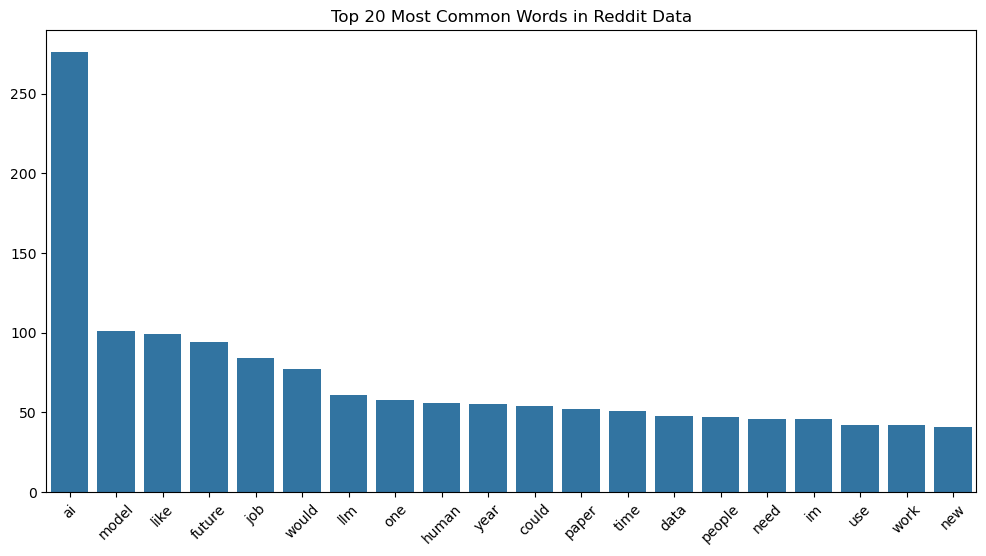

In [82]:
# Word Frequency Analysis
reddit_words = ' '.join(reddit_df['clean_text']).split()
reddit_word_freq = Counter(reddit_words)
reddit_common_words = reddit_word_freq.most_common(20)

# Plotting the most common words
words, counts = zip(*reddit_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Reddit Data')
plt.show()

#### Generate Word Cloud

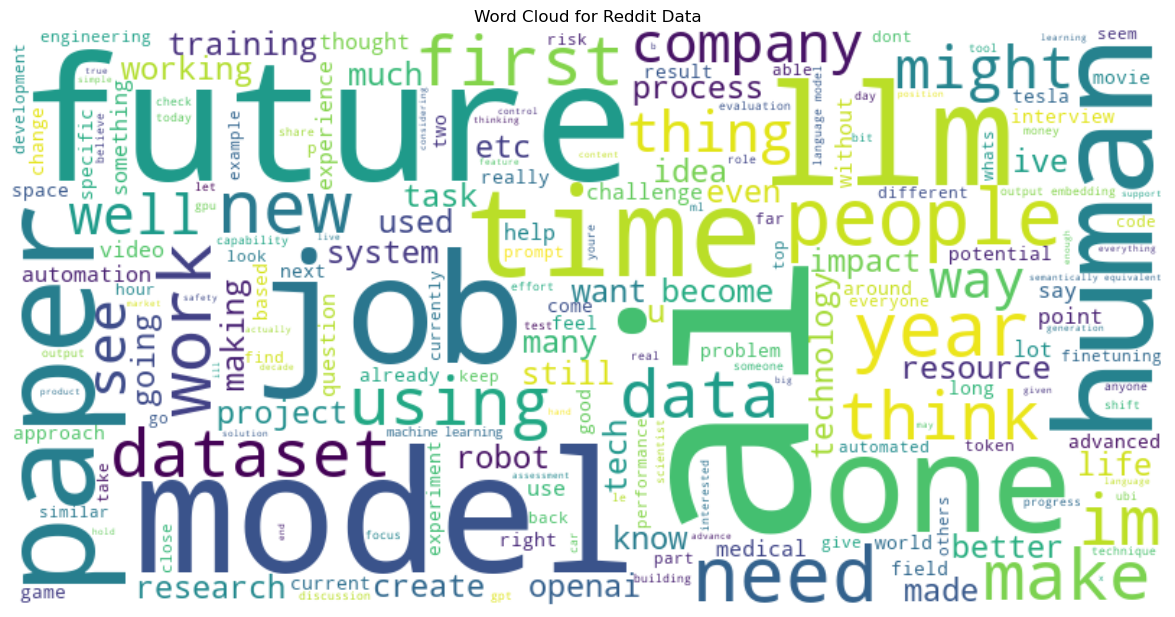

In [85]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reddit_words))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reddit Data')
plt.show()

#### Sentiment Analysis

Sentiment Analysis using NLTK's VADER

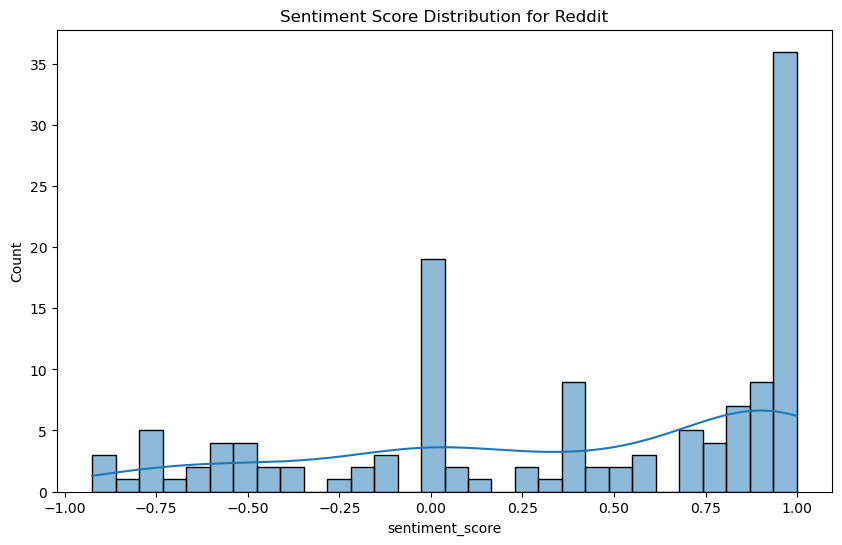

In [89]:
# Sentiment Analysis using NLTK's VADER

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

reddit_df['sentiment_score'] = reddit_df['text'].apply(get_sentiment_score)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(reddit_df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution for Reddit')
plt.show()

#### Topic Modeling

Topic Modeling using LDA

In [93]:
# Vectorize the text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
reddit_doc_term_matrix = vectorizer.fit_transform(reddit_df['clean_text'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(reddit_doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [95]:
# Display topics
print("Reddit Topics:")
for i, topic in enumerate(LDA.components_):
    topic_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Top words for topic #{i}:")
    print(" ".join(topic_words))
    print("\n")

Reddit Topics:
Top words for topic #0:
time data create project medical llm like future model ai


Top words for topic #1:
data like use make learning human future im job ai


Top words for topic #2:
agi like future risk life think safety human job ai


Top words for topic #3:
language response ive model llm training paper dataset input output


Top words for topic #4:
population ai people tesla driving level year like robot car




#### Social Network Analysis (Co-occurrence Network)

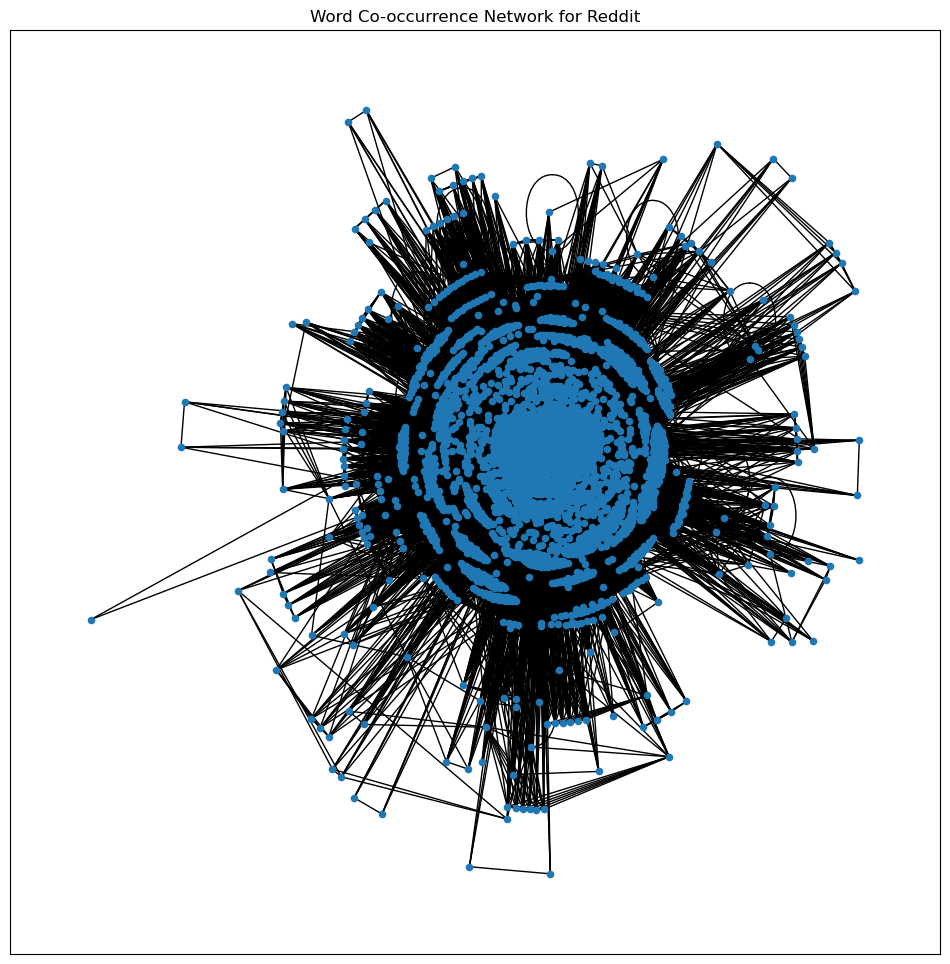

In [98]:
# Social Network Analysis (Co-occurrence Network)
def build_co_occurrence_matrix(texts):
    vocab = set()
    for text in texts:
        vocab.update(text.split())
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
    co_occurrence = np.zeros((len(vocab), len(vocab)))
    for text in texts:
        tokens = text.split()
        for w1, w2 in combinations(tokens, 2):
            i, j = vocab_index[w1], vocab_index[w2]
            co_occurrence[i][j] += 1
            co_occurrence[j][i] += 1
    return co_occurrence, vocab

co_occurrence_matrix, vocab = build_co_occurrence_matrix(reddit_df['clean_text'])

# Create network graph using from_numpy_array
G = nx.from_numpy_array(co_occurrence_matrix)
G = nx.relabel_nodes(G, dict(enumerate(vocab)))

# Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=20, font_size=10)
plt.title('Word Co-occurrence Network for Reddit')
plt.show()

#### Time Series Analysis

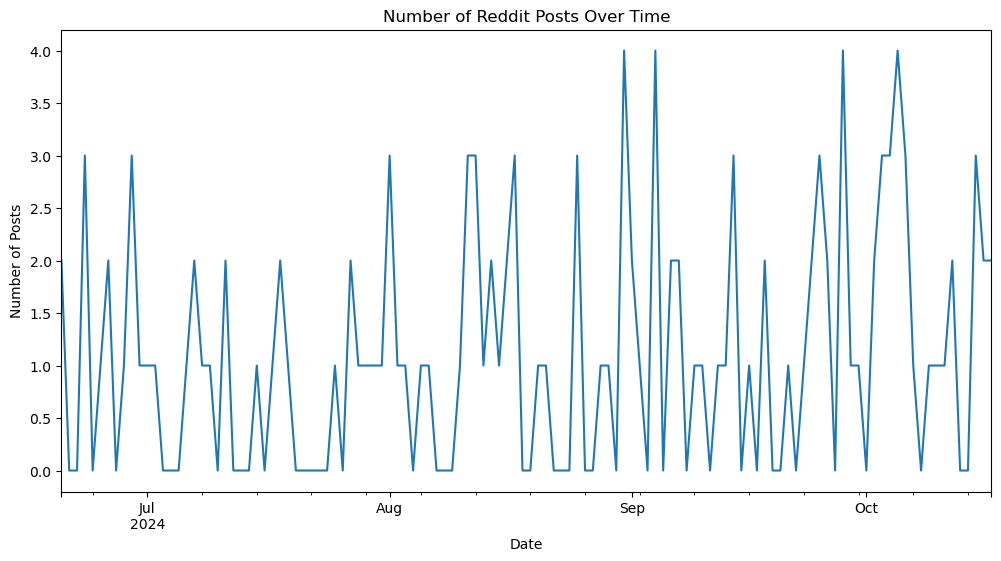

In [101]:
# Time Series Analysis
# Convert 'created' timestamps in Reddit data to datetime
reddit_df['created'] = pd.to_datetime(reddit_df['created'], unit='ms')

# Plot number of posts over time
reddit_time_series = reddit_df.set_index('created').resample('D').count()['title']

plt.figure(figsize=(12, 6))
reddit_time_series.plot()
plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

#### Engagement Analysis

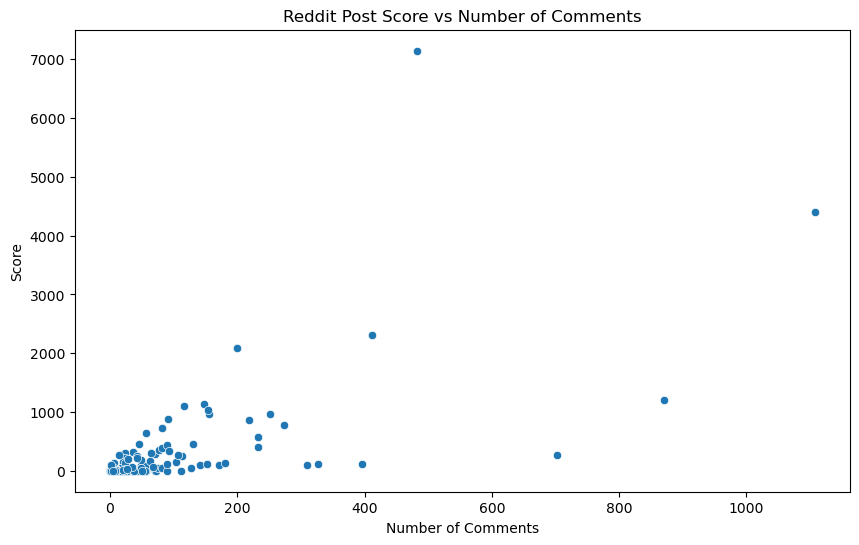

In [104]:
# Engagement Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_comments', y='score', data=reddit_df)
plt.title('Reddit Post Score vs Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.show()

# Processing YouTube Data

Extract Comments

In [108]:
# Extract comments from YouTube data
def extract_comments(data):
    comments = []
    for item in data:
        video_id = item['video_id']
        for comment in item['comments']:
            comment_text = comment['comment_text']
            comments.append({'video_id': video_id,
                             'comment_text': comment_text})
    return comments

youtube_comments = extract_comments(youtube_data)
youtube_comments_df = pd.DataFrame(youtube_comments)
youtube_comments_df.head()

,video_id,comment_text
0,lz6Hsh4TEx4,🎬 Check out the full video here: <br><br><a hr...
1,7ZXb_nrUC28,Bro send next session of full stack development
2,7ZXb_nrUC28,Thanks for this amazing video ..<br>For AI jou...
3,7ZXb_nrUC28,Quality content
4,7ZXb_nrUC28,sagar sir can you say which colour theme exten...


Preprocess Text

In [111]:
youtube_comments_df['clean_text'] = youtube_comments_df['comment_text'].apply(preprocess_text)
youtube_comments_df.head()

,video_id,comment_text,clean_text
0,lz6Hsh4TEx4,🎬 Check out the full video here: <br><br><a hr...,check full video br br https https
1,7ZXb_nrUC28,Bro send next session of full stack development,bro send next session full stack development
2,7ZXb_nrUC28,Thanks for this amazing video ..<br>For AI jou...,thanks amazing video br ai journey
3,7ZXb_nrUC28,Quality content,quality content
4,7ZXb_nrUC28,sagar sir can you say which colour theme exten...,sagar sir say colour theme extension use vs co...


#### Word Frequency Analysis

In [114]:
# Word Frequency Analysis
youtube_words = ' '.join(youtube_comments_df['clean_text']).split()
youtube_word_freq = Counter(youtube_words)
youtube_common_words = youtube_word_freq.most_common(20)

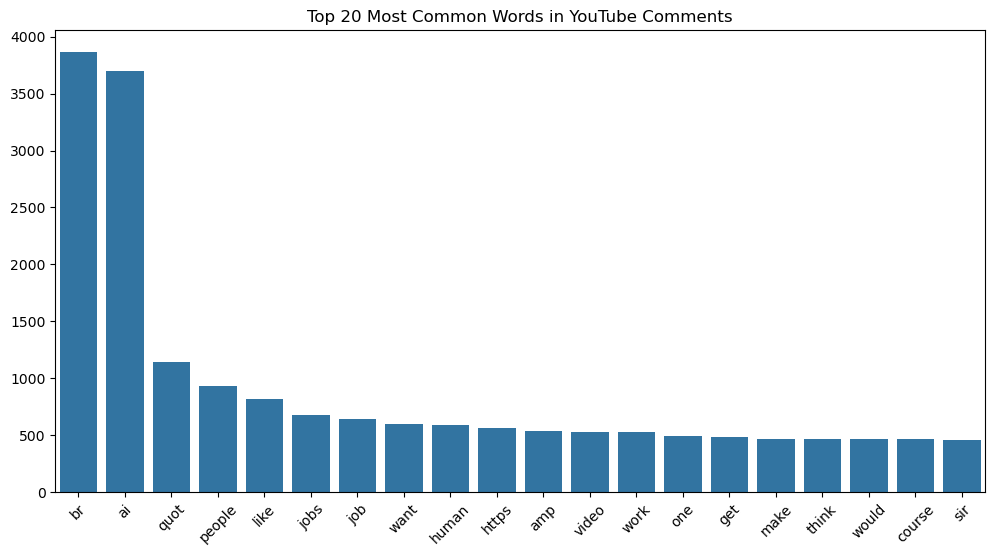

In [116]:
# Plotting the most common words
words, counts = zip(*youtube_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in YouTube Comments')
plt.show()

#### Generate Word Cloud

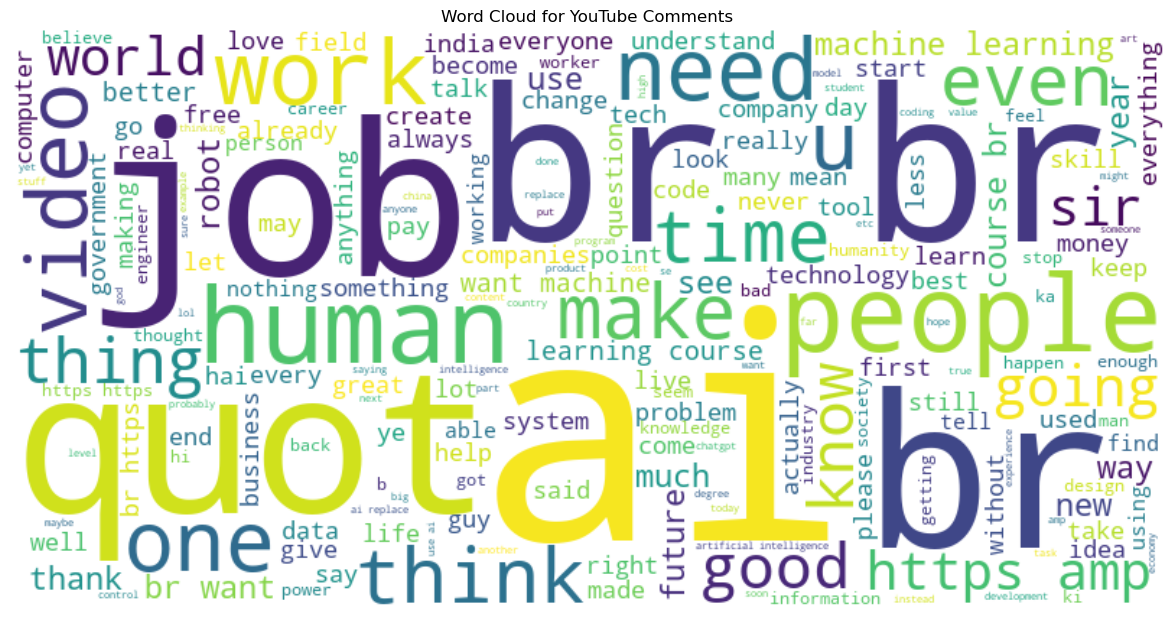

In [119]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(youtube_words))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for YouTube Comments')
plt.show()

#### Sentiment Analysis

In [122]:
# Sentiment Analysis
youtube_comments_df['sentiment_score'] = youtube_comments_df['comment_text'].apply(get_sentiment_score)

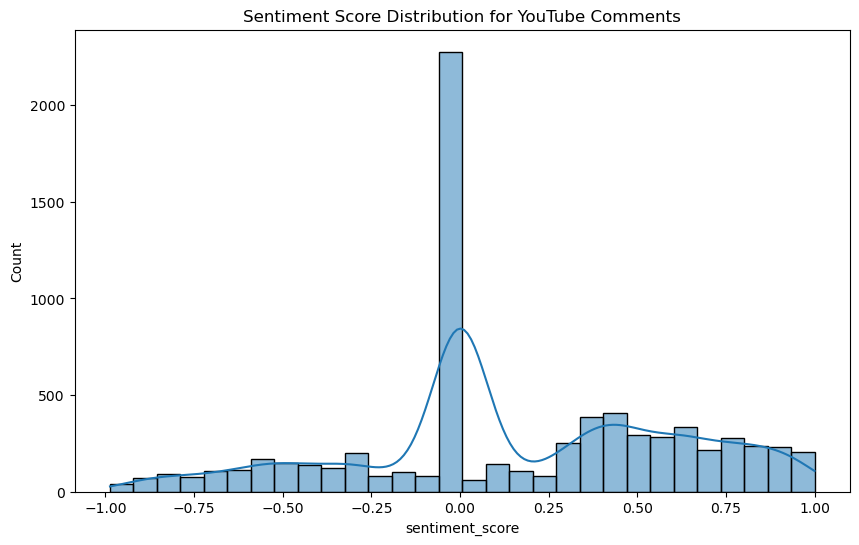

In [123]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(youtube_comments_df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution for YouTube Comments')
plt.show()

#### Topic Modeling

Topic Modeling using LDA

In [128]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
youtube_doc_term_matrix = vectorizer.fit_transform(youtube_comments_df['clean_text'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(youtube_doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [129]:
# Display topics
print("YouTube Topics:")
for i, topic in enumerate(LDA.components_):
    topic_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Top words for topic #{i}:")
    print(" ".join(topic_words))
    print("\n")

YouTube Topics:
Top words for topic #0:
free ai quot machine want learning amp course https br


Top words for topic #1:
work think value data human amp thanks like ai br


Top words for topic #2:
ke se data video ki ka job hai sir ai


Top words for topic #3:
humans need think like work human jobs people quot ai


Top words for topic #4:
great thank god people make good job like video ai




#### Social Network Analysis (Co-occurrence Network)

In [133]:
co_occurrence_matrix, vocab = build_co_occurrence_matrix(youtube_comments_df['clean_text'])

In [135]:
# Create network graph
G = nx.from_numpy_array(co_occurrence_matrix)
G = nx.relabel_nodes(G, dict(enumerate(vocab)))

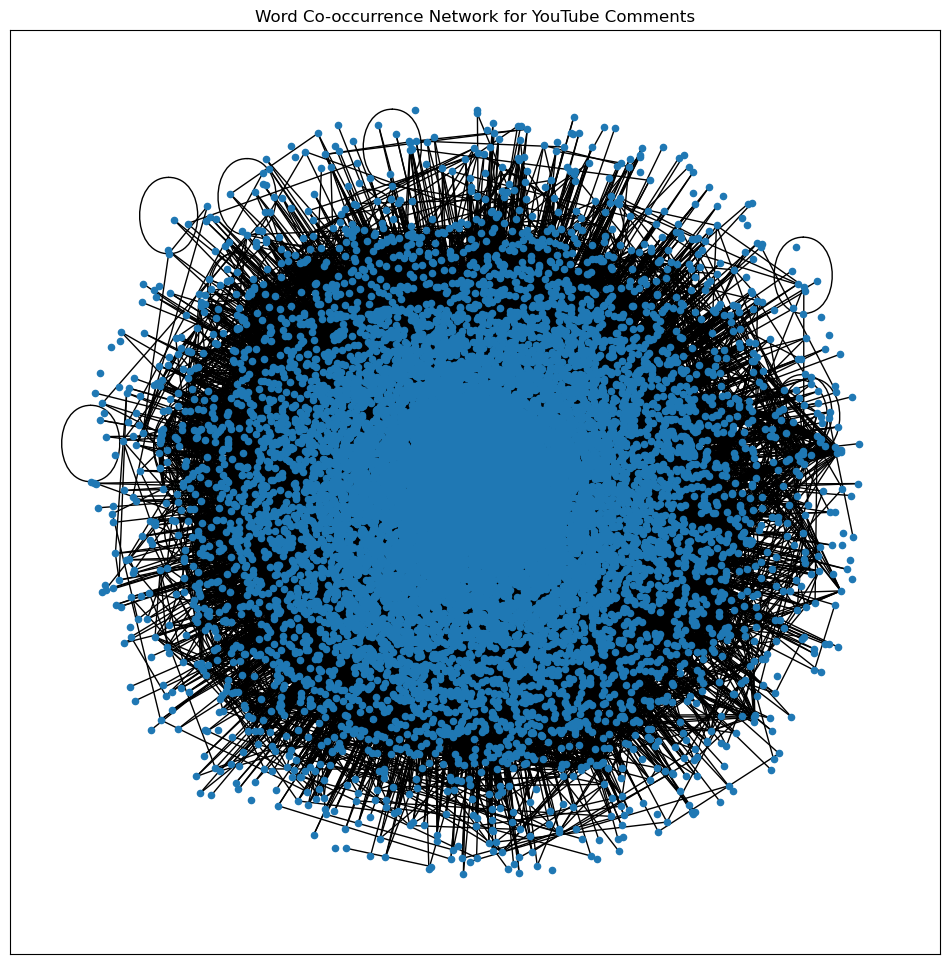

In [137]:
# Visualize the network (Optional: May be large)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=20, font_size=10)
plt.title('Word Co-occurrence Network for YouTube Comments')
plt.show()

#### Engagement Analysis

In [ ]:
# Engagement Analysis
youtube_comments_df['comment_length'] = youtube_comments_df['comment_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(youtube_comments_df['comment_length'], bins=30, kde=True)
plt.title('Distribution of YouTube Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

## Comparing Some Trends Between Reddit and YouTube

#### Sentiment Comparison

In [ ]:
# Plotting Sentiment Distribution Comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(reddit_df['sentiment_score'], label='Reddit', shade=True)
sns.kdeplot(youtube_comments_df['sentiment_score'], label='YouTube', shade=True)
plt.title('Sentiment Score Distribution Comparison')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()

#### Word Frequency Comparison

In [ ]:
# Create DataFrames for word frequencies
reddit_word_freq_df = pd.DataFrame(reddit_common_words, columns=['word', 'count'])
reddit_word_freq_df['platform'] = 'Reddit'

youtube_word_freq_df = pd.DataFrame(youtube_common_words, columns=['word', 'count'])
youtube_word_freq_df['platform'] = 'YouTube'

# Combine DataFrames
word_freq_df = pd.concat([reddit_word_freq_df, youtube_word_freq_df])

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='word', y='count', hue='platform', data=word_freq_df)
plt.xticks(rotation=45)
plt.title('Top Words Comparison Between Reddit and YouTube')
plt.show()

#### Topic Comparison

Since the topics are generated separately, we can compare the top words in each topic for both platforms.

In [ ]:
print("Comparing Top Words in Topics Between Reddit and YouTube")

# Reddit Topics
print("\nReddit Topics:")
for i, topic in enumerate(LDA.components_):
    topic_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-5:]]
    print(f"Topic #{i}: {', '.join(topic_words)}")

# YouTube Topics
print("\nYouTube Topics:")
for i, topic in enumerate(LDA.components_):
    topic_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-5:]]
    print(f"Topic #{i}: {', '.join(topic_words)}")

#### Additional 

#### Word Overlap Between Platforms

In [ ]:
# Find common words between Reddit and YouTube
reddit_words_set = set(reddit_words)
youtube_words_set = set(youtube_words)

common_words = reddit_words_set.intersection(youtube_words_set)
print(f"Number of common words: {len(common_words)}")

# Plot Venn Diagram
from matplotlib_venn import venn2

plt.figure(figsize=(8, 8))
venn2(subsets=(len(reddit_words_set), len(youtube_words_set), len(common_words)), set_labels=('Reddit', 'YouTube'))
plt.title('Word Overlap Between Reddit and YouTube')
plt.show()

#### Correlation Between Engagement and Sentiment

In [ ]:
# Reddit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_score', y='num_comments', data=reddit_df)
plt.title('Reddit: Sentiment Score vs Number of Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()

# YouTube
# Since we may not have engagement metrics, this is optional unless available

D.O

Qestions:

1. Word Frequency Analysis: Identify the most commonly used words on each platform. Are users discussing similar or different aspects of AI and future work?

2. Sentiment Analysis: Compare the overall sentiment on Reddit and YouTube. Is one platform more positive or negative about AI's impact on work?

3. Topic Modeling: Look at the main topics on each platform. Are there unique topics specific to Reddit or YouTube? What concerns or interests are prevalent?

4. Engagement Metrics: Analyze how engagement (e.g., number of comments, scores) correlates with sentiment or specific topics.

5. Social Network Analysis: Explore how words co-occur differently on each platform, indicating different discussions or narratives.

6. Time Series Analysis: (For Reddit) Observe how discussions evolve over time. Are there spikes in activity that correlate with news events or announcements?

To keep in mind:
1. Adjust Parameters: Need to adjust parameters like the number of topics in LDA models based the dataset.